# K-Means Clustering

K-Means clustering is the most popular unsupervised machine learning algorithm.
K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them.

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Mounting Gdrive for datasets

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
path = "drive/MyDrive/Facebook_Live.csv"
df=pd.read_csv(path)
print(df)

                              status_id status_type status_published  \
0      246675545449582_1649696485147474       video   4/22/2018 6:00   
1      246675545449582_1649426988507757       photo  4/21/2018 22:45   
2      246675545449582_1648730588577397       video   4/21/2018 6:17   
3      246675545449582_1648576705259452       photo   4/21/2018 2:29   
4      246675545449582_1645700502213739       photo   4/18/2018 3:22   
...                                 ...         ...              ...   
7041  1050855161656896_1061863470556065       photo   9/24/2016 2:58   
7042  1050855161656896_1061334757275603       photo  9/23/2016 11:19   
7043  1050855161656896_1060126464063099       photo  9/21/2016 23:03   
7044  1050855161656896_1058663487542730       photo   9/20/2016 0:43   
7045  1050855161656896_1050858841656528       photo  9/10/2016 10:30   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               529           512         262        4

Viewing different datatypes


In [14]:
df.dtypes

status_id           object
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

In [16]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

Checking whether any column is NULL or not

In [22]:
df.isna().sum()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7041,False,False,False,False,False,False,False,False,False,False,False,False
7042,False,False,False,False,False,False,False,False,False,False,False,False
7043,False,False,False,False,False,False,False,False,False,False,False,False
7044,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000
mean,230.081607,224.330542,40.027391,215.017173,12.720267,1.288533,0.696424,0.243826,0.112688
std,462.743890,889.865386,131.634993,449.592707,39.977520,8.721480,3.958257,1.597599,0.726125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [26]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

Removing unnecessary columns

In [27]:
df.drop(['status_id','status_published'],axis=1,inplace=True)

Label encoding the target

In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [40]:
df['status_type']=label_encoder.fit_transform(df['status_type'])
df['status_type']=label_encoder.transform(df['status_type'])

In [38]:
df['status_type']

0       3
1       1
2       3
3       1
4       1
       ..
7041    1
7042    1
7043    1
7044    1
7045    1
Name: status_type, Length: 7046, dtype: int64

Scaling the dataframe using MinMaxScalar

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
model=MinMaxScaler().fit_transform(df)

In [65]:
scaled_df=pd.DataFrame(model,columns=df.columns)

In [66]:
scaled_df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
7041,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7042,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7043,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7044,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


Using Elbow method to determine the optimal number of clusters

In [67]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

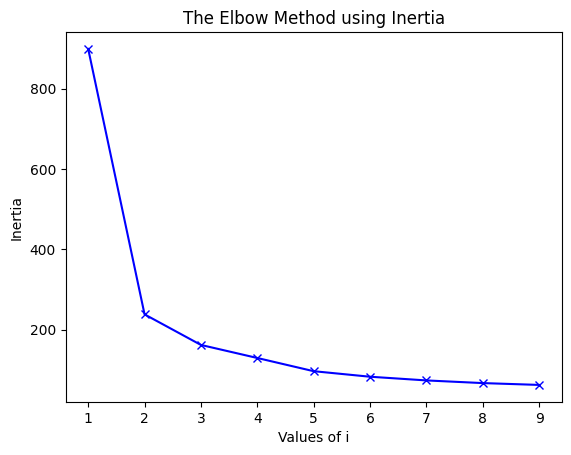

In [99]:
inertias=[]
irange=range(1,10)
for i in range(1,10):
  kmmodel=KMeans(n_clusters=i).fit(scaled_df)
  kmmodel.fit(scaled_df)
  inertias.append(kmmodel.inertia_)

plt.plot(irange, inertias, 'bx-')
plt.xlabel('Values of i')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Clustering based on the optimum value obtained above

In [97]:
i=4
clustering=KMeans(n_clusters=4,random_state=0).fit(scaled_df)
clustering.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

Determining the accuracy of model

In [98]:
labels=clustering.labels_
correct_labels=sum(df['status_type']==labels)
print("Correct labels",correct_labels)
print("Total Labels",df['status_type'].size)
print("Accuracy is",(correct_labels/df['status_type'].size)*100,"%")

Correct labels 4348
Total Labels 7046
Accuracy is 61.708770933863185 %


In [96]:
color=['darkgray','lightsalmon','powderblue','orange']